### Covid19 Effect on India Air Pollution

Using the city_day.csv dataset from the following location: https://www.kaggle.com/rohanrao/air-quality-data-in-india
This notebook is a test bed for the actual project

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import missingno as mns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
city_day_df = pd.read_csv('../Data/city_day.csv')
city_day_df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [3]:
# Let's check the start and end dates for which the data has been provided
start_date = city_day_df['Date'].min()
start_date

'2015-01-01'

In [4]:
end_date = city_day_df['Date'].max()
end_date

'2020-07-01'

In [5]:
city_day_df.shape

(29531, 16)

In [6]:
null_pm25 = city_day_df['PM2.5'].isnull().sum()
null_pm25

4598

In [7]:
pm_missing_ratio = np.round((null_pm25 / len(city_day_df) * 100), 2)
pm_missing_ratio

15.57

In [8]:
null_x = city_day_df['Xylene'].isnull().sum()
null_x

18109

In [9]:
x_missing_ratio = np.round((null_x / len(city_day_df) * 100), 2)
x_missing_ratio

61.32

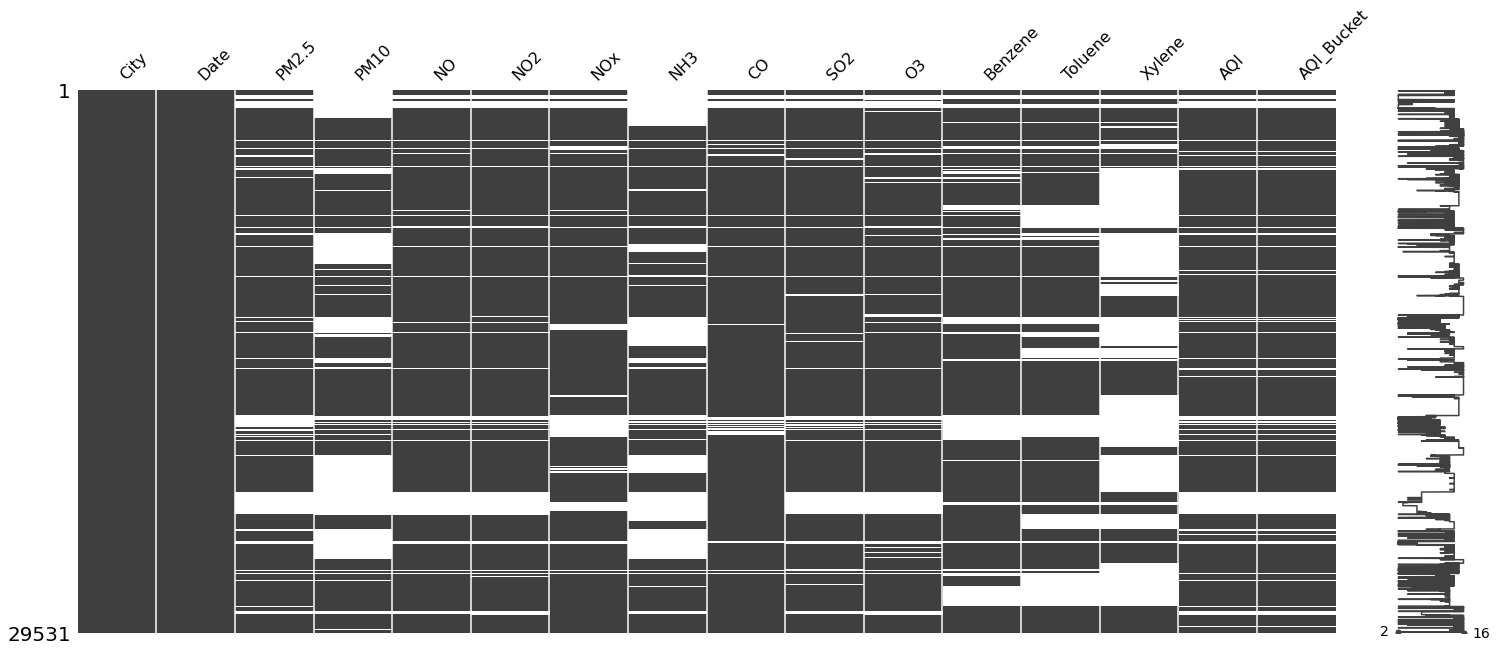

In [10]:
mns.matrix(city_day_df);

In [11]:
miss_val = city_day_df.isnull().sum()
miss_val

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
miss_val_percent = np.round((miss_val / len(city_day_df) * 100), 2)
miss_val_percent

City           0.00
Date           0.00
PM2.5         15.57
PM10          37.72
NO            12.13
NO2           12.14
NOx           14.17
NH3           34.97
CO             6.97
SO2           13.05
O3            13.62
Benzene       19.04
Toluene       27.23
Xylene        61.32
AQI           15.85
AQI_Bucket    15.85
dtype: float64

In [13]:
miss_val_table = pd.concat([miss_val, miss_val_percent], axis = 1)
miss_val_table

,0,1
City,0,0.00
Date,0,0.00
PM2.5,4598,15.57
PM10,11140,37.72
NO,3582,12.13
NO2,3585,12.14
NOx,4185,14.17
NH3,10328,34.97
CO,2059,6.97
SO2,3854,13.05


In [14]:
miss_val_table = miss_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total'})
miss_val_table

,Missing Values,% of Total
City,0,0.00
Date,0,0.00
PM2.5,4598,15.57
PM10,11140,37.72
NO,3582,12.13
NO2,3585,12.14
NOx,4185,14.17
NH3,10328,34.97
CO,2059,6.97
SO2,3854,13.05


In [15]:
miss_val_table = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values('% of Total', ascending=False)
miss_val_table.style.background_gradient(cmap='GnBu')

,Missing Values,% of Total
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [16]:
# Define a function that shows a table of missing values and their percentage to total
def miss_value_table(df):
    
    # Get all missing values from the dataframe
    missing_values = df.isnull().sum()
    
    # Calclate percentage of missing to total
    missing_values_percent = np.round((missing_values / len(df) * 100), 2)
    
    # Create a table with the above results
    missing_value_table = pd.concat([missing_values, missing_values_percent], axis = 1)
    
    # Rename table columns (defaults are 0, 1.. which we do not want)
    missing_value_table = missing_value_table.rename(
        columns = {0: 'Missing Values', 1: '% of Total'})
    
    # Sort the values (descending - % total) and remove rows that have '0' missng values
    missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total', 
                                                                                               ascending=False)    
    # return the table
    return missing_value_table

In [17]:
city_missing_values = miss_value_table(city_day_df)
city_missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [18]:
ct = city_day_df['City'].value_counts()

In [19]:
ct.index

Index(['Mumbai', 'Delhi', 'Chennai', 'Bengaluru', 'Lucknow', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')

In [20]:
cities = pd.DataFrame({
    'City': ct.index,
    'Value Counts': ct.values
})
cities.style.background_gradient(cmap='Blues')

,City,Value Counts
0,Mumbai,2009
1,Delhi,2009
2,Chennai,2009
3,Bengaluru,2009
4,Lucknow,2009
5,Ahmedabad,2009
6,Hyderabad,2006
7,Patna,1858
8,Gurugram,1679
9,Visakhapatnam,1462


In [21]:
mv = city_day_df.isnull().sum()

In [22]:
mv

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [23]:
type(mv)

pandas.core.series.Series

In [24]:
ct

Mumbai                2009
Delhi                 2009
Chennai               2009
Bengaluru             2009
Lucknow               2009
Ahmedabad             2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [25]:
cities = pd.DataFrame({
    'City': ct.index,
    'Value Counts': ct.values
})
cities = cities.style.hide_index()
#cities.style.background_gradient(cmap="Blues")

In [26]:
type(cities)

pandas.io.formats.style.Styler

In [27]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

In [28]:
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])

In [29]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [30]:
city_day_df['Year'] = pd.DatetimeIndex(city_day_df['Date']).year
city_day_df['Month'] = pd.DatetimeIndex(city_day_df['Date']).month
city_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1


In [31]:
city_day_df.set_index('Date', inplace=True)

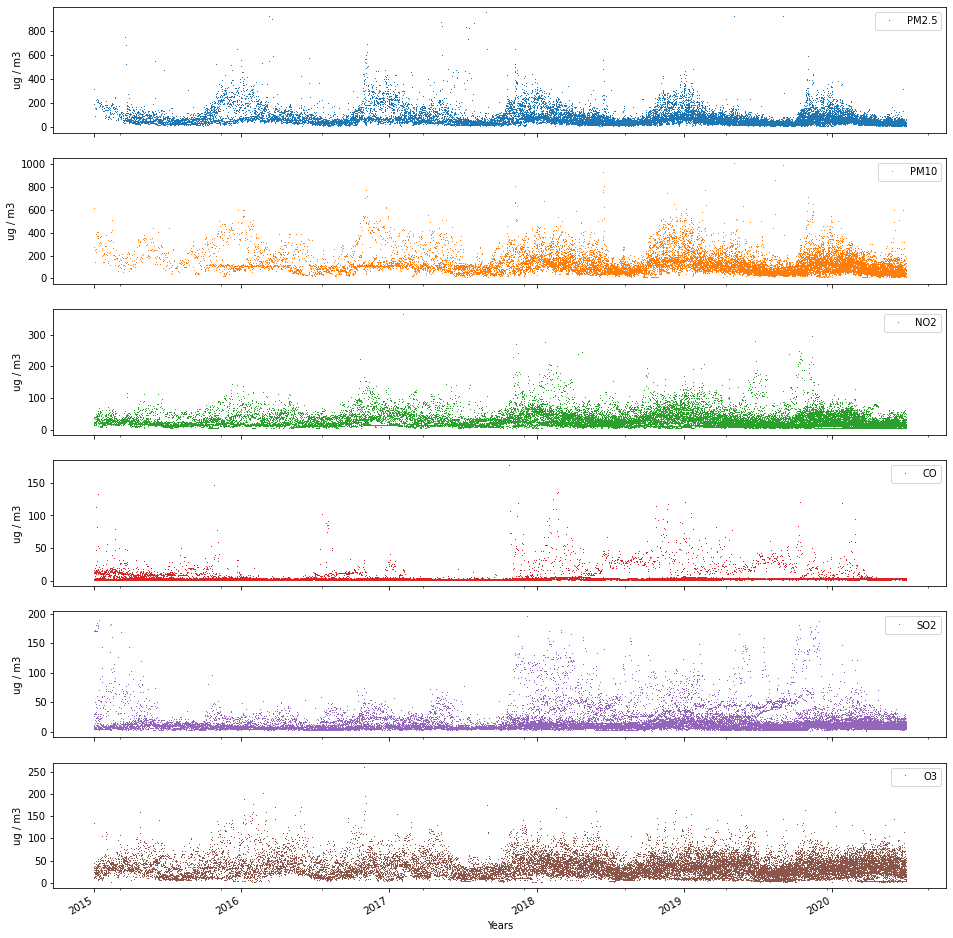

In [32]:
axes = city_day_df[pollutants].plot(marker=',', linestyle='None', figsize=(16,18), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

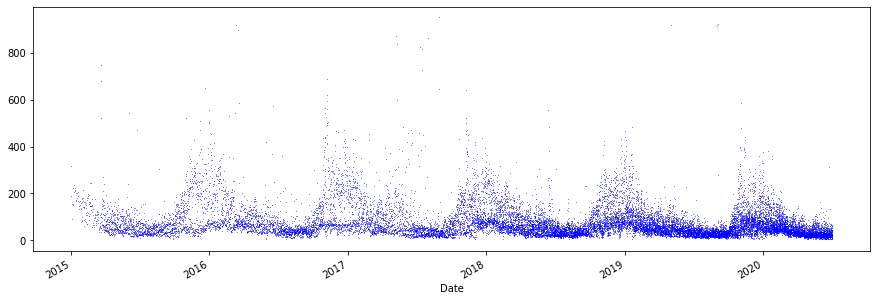

In [33]:
ax.set_xlabel('Years')
ax.set_ylabel('ug / m3')
ax = city_day_df['PM2.5'].plot(marker=',', c = 'b', linestyle='None', figsize=(15,5), alpha=0.5);

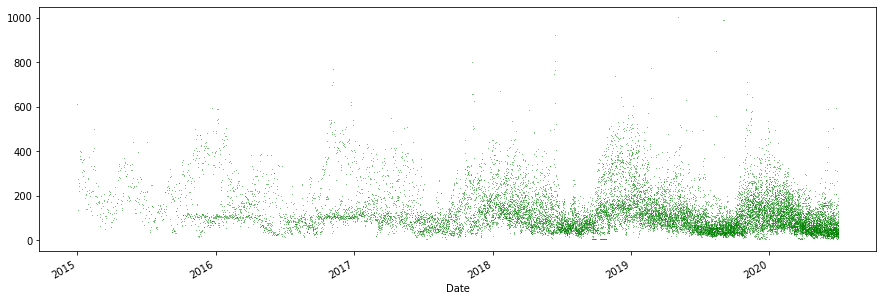

In [34]:
ax = city_day_df['PM10'].plot(marker=',', c='g', linestyle='None', figsize=(15,5), alpha=0.5);

In [35]:
def show_year_plot(df, value, c):
    ax = df[value].plot(marker='o', c=c, linestyle='None', figsize=(15,5), alpha=0.3, legend=True)
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

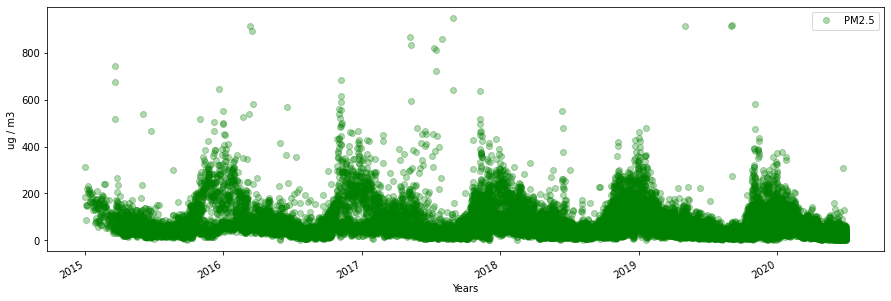

In [36]:
show_year_plot(city_day_df, 'PM2.5', 'g')

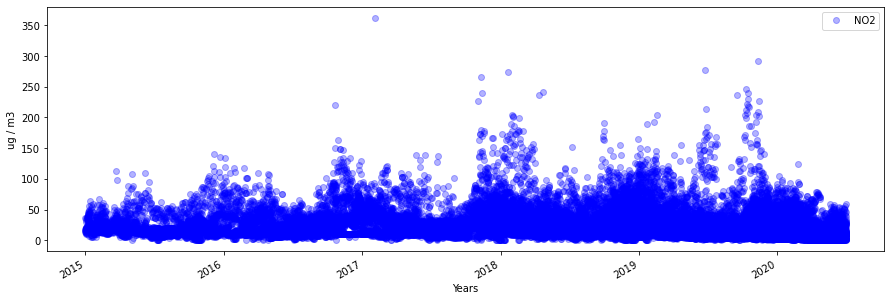

In [37]:
show_year_plot(city_day_df, 'NO2', 'b')

In [38]:
def show_trend_plot(value):
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=80)
    sns.boxplot(x='Year', y=value, data=city_day_df, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=city_day_df, ax=axes[1])

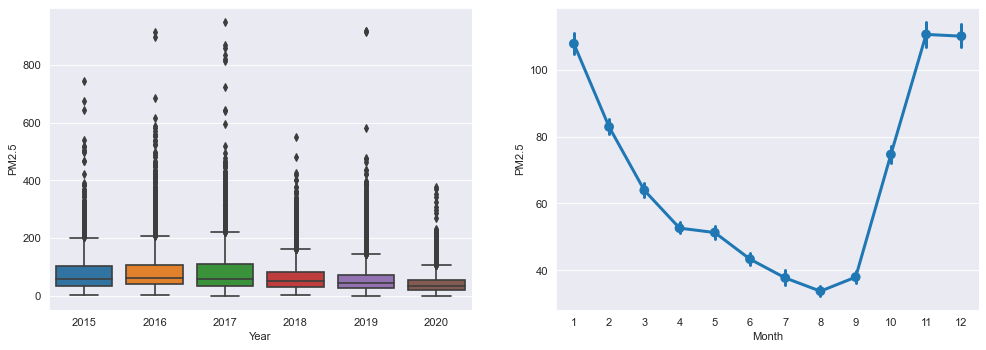

In [39]:
show_trend_plot('PM2.5')

In [52]:
# List of polluted cities, accordinng to pollutant
df1 = city_day_df[['PM2.5', 'City']].groupby(['City']).mean().sort_values(by='PM2.5', ascending=False)
df1[:10].style.background_gradient('Oranges')

,PM2.5
City,
Patna,123.498562
Delhi,117.196153
Gurugram,117.104007
Lucknow,109.714059
Ahmedabad,67.854497
Kolkata,64.362833
Jorapokhar,64.228918
Brajrajnagar,64.057610
Guwahati,63.685429


In [47]:
type(df1)

pandas.core.frame.DataFrame

In [68]:
# Create a function to show most polluted cities, according to pollutant
def top_cities_pollutant(value):
    df1 = city_day_df[[value, 'City']].groupby(['City']).mean().sort_values(by=value, ascending=False).reset_index()
    return df1[:10].style.background_gradient(cmap='Oranges')

In [69]:
pm10 = top_cities_pollutant('PM10')
pm10

,City,PM10
0,Delhi,232.809229
1,Gurugram,191.504432
2,Talcher,165.772708
3,Jorapokhar,149.657942
4,Patna,126.747958
5,Brajrajnagar,124.217373
6,Jaipur,123.483509
7,Bhopal,119.324321
8,Guwahati,116.604900
9,Kolkata,115.629499


In [79]:
!pip install plotly

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [84]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [103]:
def top_cities_graph(value):
    df2 = city_day_df[[value, 'City']].groupby(['City']).mean().sort_values(by=value, ascending=False).reset_index()
    df3 = df2[:10]
    fig = make_subplots(
        rows=1, cols=1,
        column_width=[2],
        subplot_titles=(value, ""))

    fig.add_trace(go.Bar(x=df3['City'], y=df3[value], marker=dict(color=df3[value], coloraxis="coloraxis")), 1, 1)
    fig.update_layout(coloraxis=dict(colorscale='Oranges'), showlegend=False,plot_bgcolor='white')
    fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="Cities")
    fig.update_yaxes(title_text="ug / m3", row=1, col=1)
    fig.show()

In [104]:
top_cities_graph('PM10')